In [5]:
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/kjeanclaude/porto-seguros-safe-driver-prediction-files?select=train.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prernaroy
Your Kaggle Key: ········


100%|██████████████████████████████████████| 74.4M/74.4M [00:11<00:00, 6.63MB/s]


In [8]:
import os

In [10]:
os.listdir()

['animals_knn_assignment.ipynb',
 'Untitled.ipynb',
 'KNN.ipynb',
 'safedrive_data',
 '.ipynb_checkpoints',
 'Data',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'Classification_Metrics_kNN,_DT,_RF.ipynb',
 'animals_knn.pdf']

In [12]:
pwd

'/Users/prernaroy/Desktop/ftds/02MachineLearning/03KNN'

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
tr = pd.read_csv("./safedrive_data/train.csv")
tr.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [14]:
te = pd.read_csv("./safedrive_data/test.csv")
te.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [18]:
print(tr.shape)
print(te.shape)

(595212, 59)
(892816, 58)


In [19]:
tr.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
tr.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [33]:
tr.target.value_counts()  #imbalanced dataset

0    573518
1     21694
Name: target, dtype: int64

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score, average_precision_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [108]:
def evalmetrics(y_test, model_pred):
    print('Accuracy =', accuracy_score(y_test, model_pred))
    print('f1 score =', f1_score(y_test, model_pred))
    print('Recall =', recall_score(y_test, model_pred))
    print('Precision =', precision_score(y_test, model_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, model_pred)
    return 

### Oversampling

In [37]:
X = tr.iloc[:, 2:]
y = tr.target

In [39]:
# set up training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [40]:
# concatenate the training data back together 
X = pd.concat([X_train, y_train], axis=1)

In [41]:
# separate the minority and majority classes 
claim, no_claim = X[X.target == 1], X[X.target == 0]

In [42]:
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
391389,7,1,9,1,0,0,0,1,0,0,...,2,4,10,0,1,1,0,0,1,0
518243,5,1,3,1,0,0,1,0,0,0,...,1,6,12,0,1,1,0,1,0,0
136933,0,1,6,1,0,1,0,0,0,0,...,3,4,10,0,0,1,0,1,0,0
432345,0,1,4,1,0,1,0,0,0,0,...,3,4,8,0,0,1,0,1,0,0
127021,1,1,2,0,0,0,0,0,1,0,...,1,4,5,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,3,5,1,0,0,1,0,0,0,...,4,3,5,0,0,1,0,0,0,0
259178,4,1,4,1,0,0,1,0,0,0,...,2,3,7,0,1,1,0,1,0,0
365838,2,1,7,0,0,0,0,1,0,0,...,1,5,8,1,0,1,1,0,0,0
131932,7,4,11,1,0,0,1,0,0,0,...,1,3,6,1,1,1,0,0,0,0


In [46]:
from sklearn.utils import resample

# upsample minority
claim_upsampled = resample(claim,
                          replace=True,
                          n_samples=len(no_claim),
                          random_state=42)

In [47]:
# combine majority with upsamples minority 
upsampled = pd.concat([no_claim, claim_upsampled])

In [48]:
# check new class counts - should be equal as we set n_samples to len of majority class
upsampled.target.value_counts()

0    401539
1    401539
Name: target, dtype: int64

In [49]:
# re-assign y_train and X_train values using the upsampled data
y_train, X_train = upsampled.target, upsampled.drop('target', axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler as sc
sc = StandardScaler()
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [ ]:
# use Logistic Regression with the now balanced dataset

In [63]:
upsampled_lr = LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)

In [64]:
# make predictions on the testing dataset
upsampled_lr_pred = upsampled_lr.predict(X_test)

In [ ]:
# Check accuracy, f1 score, recall, and precision scores

Accuracy = 0.6238715530566071
f1 score = 0.09759898961398418
Recall = 0.5515565679574791
Precision = 0.05353615754252528


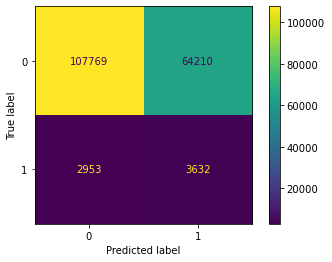

In [65]:
print('Accuracy =', accuracy_score(y_test, upsampled_lr_pred))
print('f1 score =', f1_score(y_test, upsampled_lr_pred))
print('Recall =', recall_score(y_test, upsampled_lr_pred))
print('Precision =', precision_score(y_test, upsampled_lr_pred))
ConfusionMatrixDisplay.from_predictions(y_test, upsampled_lr_pred)

### Undersampling

In [86]:
# Try using undersampling method 
no_claim_ds = resample(no_claim,
                      replace = False,
                      n_samples = len(claim),
                      random_state=42)

In [87]:
downsampled = pd.concat([no_claim_ds, claim])

In [88]:
downsampled.target.value_counts() # Equal number of claim/no claim
# Smaller quantity, same amount of records as no claim

0    15109
1    15109
Name: target, dtype: int64

In [89]:
y_train_ds, X_train_ds = downsampled.target, downsampled.drop('target', axis=1)

In [90]:
X_train_ds = sc.fit_transform(X_train_ds)

In [91]:
downsampled_lr = LogisticRegression(solver='liblinear').fit(X_train_ds, y_train_ds)

In [92]:
downsampled_lr_pred = downsampled_lr.predict(X_test)

Accuracy = 0.6237315472323649
f1 score = 0.09805079740106319
Recall = 0.5545937737281701
Precision = 0.05377943363718026


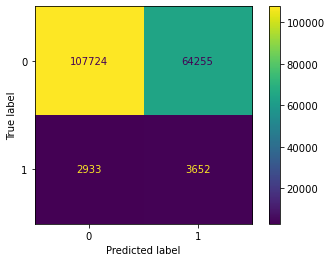

In [93]:
print('Accuracy =', accuracy_score(y_test, downsampled_lr_pred))
print('f1 score =', f1_score(y_test, downsampled_lr_pred))
print('Recall =', recall_score(y_test, downsampled_lr_pred))
print('Precision =', precision_score(y_test, downsampled_lr_pred))
ConfusionMatrixDisplay.from_predictions(y_test, downsampled_lr_pred)

### SMOTE

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
X, y = tr.drop('target', axis=1), tr.target

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [100]:
sm = SMOTE(random_state=42, n_jobs=-1)

In [102]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [103]:
smote_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [104]:
smote_lr_pred = smote_lr.predict(X_test)

Accuracy = 0.9276673909634641
f1 score = 0.04495711328009464
Recall = 0.046165527714502656
Precision = 0.04381034731229284


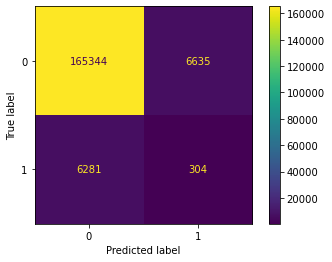

In [105]:
print('Accuracy =', accuracy_score(y_test, smote_lr_pred))
print('f1 score =', f1_score(y_test, smote_lr_pred))
print('Recall =', recall_score(y_test, smote_lr_pred))
print('Precision =', precision_score(y_test, smote_lr_pred))
ConfusionMatrixDisplay.from_predictions(y_test, smote_lr_pred)

### Random Forest - Using Pipelines

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [113]:
tr = tr.drop('id', axis=1)
tr.head(2)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0


In [115]:
X, y = tr.drop('target', axis=1), tr.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [118]:
numeric_features_list = X_train.columns.tolist()
print(numeric_features)

['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [121]:
# Create a preprocessing pipeline for the numerical data (can also be done for categorical)
numeric_features = numeric_features_list
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
transformers = [
    ('num', numeric_transformer, numeric_features)])

Accuracy = 0.9631645707853465
f1 score = 0.0
Recall = 0.0
Precision = 0.0


/Users/prernaroy/opt/anaconda3/envs/ftds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


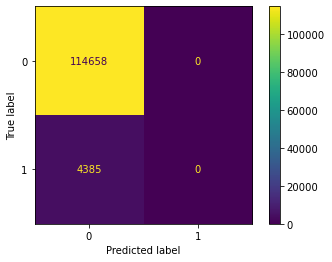

In [123]:
rf_clf = Pipeline(steps = [('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))])

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
evalmetrics(y_test, rf_pred)

In [129]:
unique, counts = np.unique(rf_pred, return_counts=True)

In [131]:
print(unique, counts) # --> everything was predicted as a 0

[0] [119043]


### XGBoost

/Users/prernaroy/opt/anaconda3/envs/ftds/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9631729711112791
f1 score = 0.001821493624772313
Recall = 0.0009122006841505131
Precision = 0.5714285714285714


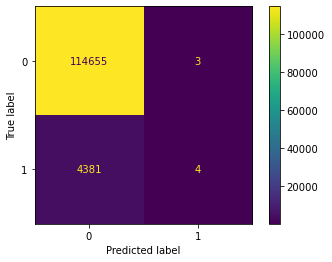

In [132]:
import xgboost 
xgmodel = Pipeline(steps=[('preprocessor', preprocessor),('classifier', xgboost.XGBClassifier())])

xgmodel.fit(X_train, y_train)
                          
xgb_pred = xgmodel.predict(X_test)
evalmetrics(y_test, xgb_pred)

### Logistic Regression 

Accuracy = 0.9631645707853465
f1 score = 0.0
Recall = 0.0
Precision = 0.0


/Users/prernaroy/opt/anaconda3/envs/ftds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


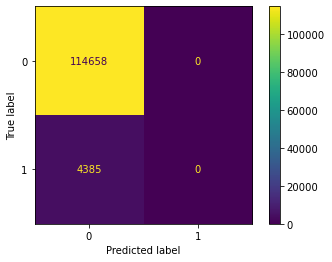

In [133]:
clf_lr = Pipeline(steps = [('preprocessor', preprocessor), 
                          ('classifier', LogisticRegression(solver='liblinear', random_state=42))])
clf_lr.fit(X_train, y_train)
lr_pred = clf_lr.predict(X_test)
evalmetrics(y_test, lr_pred)

In [140]:
X_train[X_train.isna()] --> retry by dealing with NaN values

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
39028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
